Firt name: Kamiar (Kamy)\
Last name: Asgari (Gary)\
USC ID: 4590556658\
Github Username: kamiarasgari

# 1. Supervised, Semi-Supervised, and Unsupervised Learning

In [1]:
RS = 0
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import Normalizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_validate, StratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, roc_auc_score
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.neighbors import KNeighborsClassifier

from scipy.spatial.distance import cdist
from scipy.special import softmax


import warnings
warnings.filterwarnings("ignore")
import os
os.environ['PYTHONWARNINGS'] = 'ignore'

## 1(a). Download the Breast Cancer Wisconsin (Diagnostic) Data Set from...

In [2]:
wdbc_data = "../data/wdbc.data"
wdbc_data = pd.read_csv(wdbc_data, header=None)
wdbc_data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
temp = []
for i in range(len(wdbc_data.columns)):
    if i == 0:
        temp.append('id')
    elif i == 1:
        temp.append('label')
    else:
        temp.append('attribute_'+str(i-1))

wdbc_data.columns = temp
wdbc_data.replace({'M': 1, 'B': 0}, inplace=True)
wdbc_data

,id,label,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,...,attribute_21,attribute_22,attribute_23,attribute_24,attribute_25,attribute_26,attribute_27,attribute_28,attribute_29,attribute_30
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
wdbc_data['label'].value_counts()

label
0    357
1    212
Name: count, dtype: int64

## 1(b). Monte-Carlo Simulation: Repeat the following procedures for supervised, un-supervised, and semi-supervised learning ...

In [5]:
X_full = np.array(wdbc_data.drop(['label', 'id'], axis=1))
y_full = np.array(wdbc_data['label'])

I_1 = np.where(y_full==1)
I_0 = np.where(y_full==0)

X_1 = X_full[I_1]
y_1 = y_full[I_1]
X_0 = X_full[I_0]
y_0 = y_full[I_0]

def get_split(random_state=RS):
    X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.2, random_state=random_state)
    X_0_train, X_0_test, y_0_train, y_0_test = train_test_split(X_0, y_0, test_size=0.2, random_state=random_state)

    X_train = np.concatenate((X_1_train, X_0_train))
    y_train = np.concatenate((y_1_train, y_0_train))
    X_test = np.concatenate((X_1_test, X_0_test))
    y_test = np.concatenate((y_1_test, y_0_test))
    
    return X_train, X_test, y_train, y_test

### 1(b)-i. **Supervised Learning:** Train an $L1$-penalized SVM to classify the data. Use 5 fold...

In [6]:
M = 30
accuracy_train = []
accuracy_test = []
precision_train = []
precision_test = []
recall_train = []
recall_test = []
f1_train = []
f1_test = []
auc_train = []
auc_test = []
confusion_train = []
confusion_test = []

Iteration: 1 | Training Accuracy: 0.98 | Test Accuracy: 0.98
Best parameter: {'C': 7847.599703514615} 

Iteration: 2 | Training Accuracy: 0.978 | Test Accuracy: 0.978
Best parameter: {'C': 3162.2776601683795} 

Iteration: 3 | Training Accuracy: 0.978 | Test Accuracy: 0.978
Best parameter: {'C': 5796.393953384967} 

Iteration: 4 | Training Accuracy: 0.993 | Test Accuracy: 0.993
Best parameter: {'C': 26366.508987303554} 

Iteration: 5 | Training Accuracy: 0.985 | Test Accuracy: 0.985
Best parameter: {'C': 48329.30238571752} 

Iteration: 6 | Training Accuracy: 0.996 | Test Accuracy: 0.996
Best parameter: {'C': 35696.98846826063} 

Iteration: 7 | Training Accuracy: 0.985 | Test Accuracy: 0.985
Best parameter: {'C': 88586.67904100832} 

Iteration: 8 | Training Accuracy: 0.978 | Test Accuracy: 0.978
Best parameter: {'C': 7847.599703514615} 

Iteration: 9 | Training Accuracy: 0.978 | Test Accuracy: 0.978
Best parameter: {'C': 7847.599703514615} 

Iteration: 10 | Training Accuracy: 0.989 | Tes

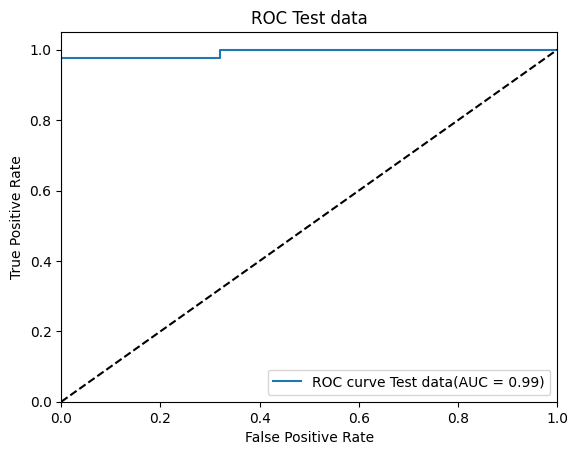

confiusion matrix test
[[69  3]
 [ 1 42]]


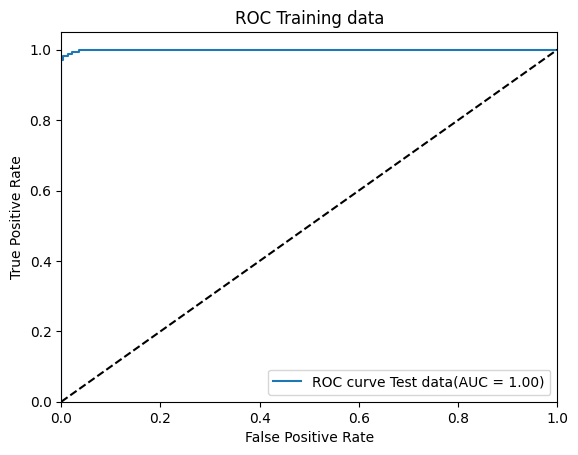

confiusion matrix train
[[283   2]
 [  3 166]]


In [7]:
normalizer = Normalizer()

for i in range(M):
    X_train, X_test, y_train, y_test = get_split(random_state=i)
    X_train_normalized = normalizer.fit_transform(X_train)
    X_test_normalized = normalizer.fit_transform(X_test)
    
    model = LinearSVC(penalty='l1', dual=False, random_state=i)
    skf = StratifiedKFold(n_splits=5, random_state=i, shuffle=True)
    #param_grid = {'C': [5000, 10000, 50000, 80000]}
    param_grid = {'C': np.logspace(3.5, 6, num=20, endpoint=True, base=10.0)}
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=skf, n_jobs=-1)
    
    grid_search.fit(X_train_normalized, y_train)
    
    # Predict on the training and test sets
    y_train_pred = grid_search.predict(X_train_normalized)
    y_test_pred = grid_search.predict(X_test_normalized)
    
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_test.append(accuracy_score(y_test, y_test_pred))
    precision_train.append(precision_score(y_train, y_train_pred))
    precision_test.append(precision_score(y_test, y_test_pred))
    recall_train.append(recall_score(y_train, y_train_pred))
    recall_test.append(recall_score(y_test, y_test_pred))
    f1_train.append(f1_score(y_train, y_train_pred))
    f1_test.append(f1_score(y_test, y_test_pred))
    auc_train.append(roc_auc_score(y_train, y_train_pred))
    auc_test.append(roc_auc_score(y_test, y_test_pred))
    
    print('Iteration:', i+1, '| Training Accuracy:', round(accuracy_train[-1],3), '| Test Accuracy:', round(accuracy_train[-1],3))
    print('Best parameter:', grid_search.best_params_,'\n')
    
# Averaging all metrics
print('-'*60)
print("Averaging all metrics")

data = {
    'acc' : [np.average(np.array(accuracy_train)), np.average(np.array(accuracy_test))],
    'precision' : [np.average(np.array(precision_train)), np.average(np.array(precision_test))],
    'recall' : [np.average(np.array(recall_train)), np.average(np.array(recall_test))],
    'f1-score' : [np.average(np.array(f1_train)), np.average(np.array(f1_test))],
    'auc' : [np.average(np.array(auc_train)), np.average(np.array(auc_test))],
}
summary = pd.DataFrame(data)
summary.set_index = ['training', 'test']
print(summary)
print('-'*60)

# ROC curve for test 
y_test_pred_prob = grid_search.decision_function(X_test_normalized)
fpr, tpr, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve Test data(AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Test data')
plt.legend(loc='lower right')
plt.show()

# confiusion matrix test
print('confiusion matrix test')
print(confusion_matrix(y_test, y_test_pred))

# ROC curve for train
y_train_pred_prob = grid_search.decision_function(X_train_normalized)
fpr, tpr, _ = roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve Test data(AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Training data')
plt.legend(loc='lower right')
plt.show()

# confiusion matrix training
print('confiusion matrix train')
print(confusion_matrix(y_train, y_train_pred))


### 1(b)-ii. **Semi-Supervised Learning/ Self-training:** Select 50% of the positive class along with 50% of the negative class in the training set as labeled d...

Iteration: 1 | Training Accuracy: 0.971 | Test Accuracy: 0.971 

Iteration: 2 | Training Accuracy: 0.969 | Test Accuracy: 0.969 

Iteration: 3 | Training Accuracy: 0.967 | Test Accuracy: 0.967 

Iteration: 4 | Training Accuracy: 0.98 | Test Accuracy: 0.98 

Iteration: 5 | Training Accuracy: 0.969 | Test Accuracy: 0.969 

Iteration: 6 | Training Accuracy: 0.978 | Test Accuracy: 0.978 

Iteration: 7 | Training Accuracy: 0.965 | Test Accuracy: 0.965 

Iteration: 8 | Training Accuracy: 0.969 | Test Accuracy: 0.969 

Iteration: 9 | Training Accuracy: 0.967 | Test Accuracy: 0.967 

Iteration: 10 | Training Accuracy: 0.982 | Test Accuracy: 0.982 

Iteration: 11 | Training Accuracy: 0.985 | Test Accuracy: 0.985 

Iteration: 12 | Training Accuracy: 0.969 | Test Accuracy: 0.969 

Iteration: 13 | Training Accuracy: 0.971 | Test Accuracy: 0.971 

Iteration: 14 | Training Accuracy: 0.963 | Test Accuracy: 0.963 

Iteration: 15 | Training Accuracy: 0.978 | Test Accuracy: 0.978 

Iteration: 16 | Train

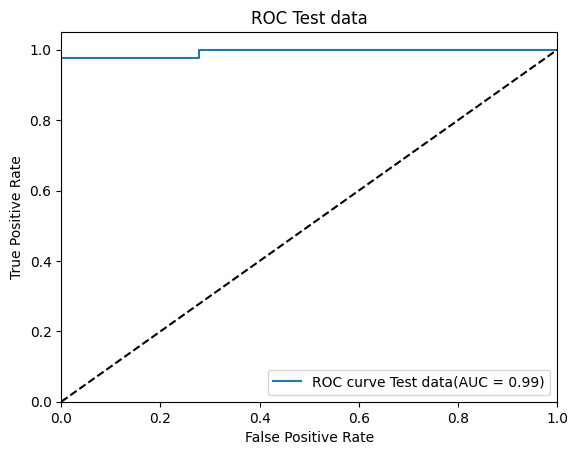

confiusion matrix test
[[70  2]
 [ 1 42]]


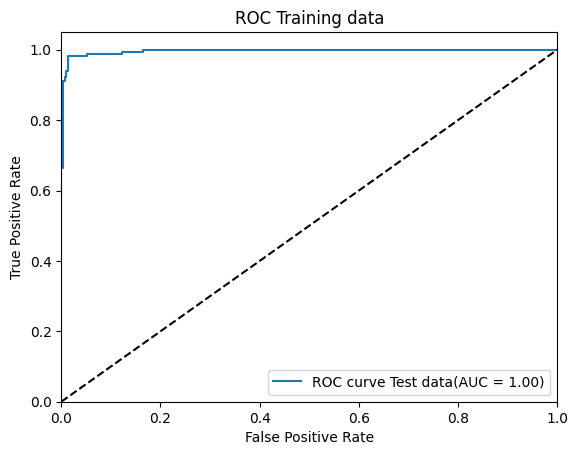

confiusion matrix train
[[281   4]
 [  4 165]]


In [8]:
M = 30
accuracy_train = []
accuracy_test = []
precision_train = []
precision_test = []
recall_train = []
recall_test = []
f1_train = []
f1_test = []
auc_train = []
auc_test = []
confusion_train = []
confusion_test = []

for i in range(M):
    # split the data 
    X_train, X_test, y_train, y_test = get_split(random_state=i)
    # normalize
    X_train_normalized = normalizer.fit_transform(X_train)
    X_test_normalized = normalizer.fit_transform(X_test)

    # 50%-50%
    X_train_normalized_labeled, X_train_normalized_unlabeled, y_train_labeled, _ = train_test_split(X_train_normalized, y_train, test_size=0.5, random_state=i)

    # initialize the model
    model = LinearSVC(penalty='l1', dual=False, random_state=i)
    skf = StratifiedKFold(n_splits=5, random_state=i, shuffle=True)
    param_grid = {'C': np.logspace(3.5, 6, num=20, endpoint=True, base=10.0)}
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=skf, n_jobs=-1)
    grid_search.fit(X_train_normalized_labeled, y_train_labeled)

    # keep the best model
    best_model = grid_search.best_estimator_

    # step 2:
    while len(X_train_normalized_unlabeled) > 0:
        scores = best_model.decision_function(X_train_normalized_unlabeled)
        farthest_index = np.argmax(np.abs(scores))
        new = X_train_normalized_unlabeled[farthest_index].reshape(1, -1)
        predicted_label = best_model.predict(new)
        
        X_train_normalized_labeled = np.concatenate((X_train_normalized_labeled, new))
        y_train_labeled = np.concatenate((y_train_labeled, predicted_label))

        X_train_normalized_unlabeled = np.delete(X_train_normalized_unlabeled, farthest_index, axis=0)

        best_model.fit(X_train_normalized_labeled, y_train_labeled)
    
    # Predict on the training and test sets
    y_train_pred = best_model.predict(X_train_normalized)
    y_test_pred = best_model.predict(X_test_normalized)
    
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_test.append(accuracy_score(y_test, y_test_pred))
    precision_train.append(precision_score(y_train, y_train_pred))
    precision_test.append(precision_score(y_test, y_test_pred))
    recall_train.append(recall_score(y_train, y_train_pred))
    recall_test.append(recall_score(y_test, y_test_pred))
    f1_train.append(f1_score(y_train, y_train_pred))
    f1_test.append(f1_score(y_test, y_test_pred))
    auc_train.append(roc_auc_score(y_train, y_train_pred))
    auc_test.append(roc_auc_score(y_test, y_test_pred))
    
    print('Iteration:', i+1, '| Training Accuracy:', round(accuracy_train[-1],3), '| Test Accuracy:', round(accuracy_train[-1],3),'\n')
    
# Averaging all metrics
print('-'*60)
print("Averaging all metrics")

data = {
    'acc' : [np.average(np.array(accuracy_train)), np.average(np.array(accuracy_test))],
    'precision' : [np.average(np.array(precision_train)), np.average(np.array(precision_test))],
    'recall' : [np.average(np.array(recall_train)), np.average(np.array(recall_test))],
    'f1-score' : [np.average(np.array(f1_train)), np.average(np.array(f1_test))],
    'auc' : [np.average(np.array(auc_train)), np.average(np.array(auc_test))],
}
summary = pd.DataFrame(data)
summary.set_index = ['training', 'test']
print(summary)
print('-'*60)

# ROC curve for test 
y_test_pred_prob = best_model.decision_function(X_test_normalized)
fpr, tpr, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve Test data(AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Test data')
plt.legend(loc='lower right')
plt.show()

# confiusion matrix test
print('confiusion matrix test')
print(confusion_matrix(y_test, y_test_pred))

# ROC curve for train
y_train_pred_prob = best_model.decision_function(X_train_normalized)
fpr, tpr, _ = roc_curve(y_train, y_train_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve Test data(AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Training data')
plt.legend(loc='lower right')
plt.show()

# confiusion matrix training
print('confiusion matrix train')
print(confusion_matrix(y_train, y_train_pred))


### 1(b)-iii. **Unsupervised Learning:** Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume $k = 2$.

In [9]:
def kmean_pred(model, X, flip):
    temp = model.predict(X)
    return (1-flip)*temp + flip*(1-temp)

def kmean_prob(model, X, flip):
    temp = model.transform(X)
    temp = softmax(temp/100,axis=1)
    return (1-flip)*temp + flip*(1-temp)

Iteration: 1 | Training Accuracy: 0.859 | Test Accuracy: 0.859 

Iteration: 2 | Training Accuracy: 0.857 | Test Accuracy: 0.857 

Iteration: 3 | Training Accuracy: 0.85 | Test Accuracy: 0.85 

Iteration: 4 | Training Accuracy: 0.819 | Test Accuracy: 0.819 

Iteration: 5 | Training Accuracy: 0.861 | Test Accuracy: 0.861 

Iteration: 6 | Training Accuracy: 0.85 | Test Accuracy: 0.85 

Iteration: 7 | Training Accuracy: 0.848 | Test Accuracy: 0.848 

Iteration: 8 | Training Accuracy: 0.85 | Test Accuracy: 0.85 

Iteration: 9 | Training Accuracy: 0.855 | Test Accuracy: 0.855 

Iteration: 10 | Training Accuracy: 0.859 | Test Accuracy: 0.859 

Iteration: 11 | Training Accuracy: 0.859 | Test Accuracy: 0.859 

Iteration: 12 | Training Accuracy: 0.857 | Test Accuracy: 0.857 

Iteration: 13 | Training Accuracy: 0.841 | Test Accuracy: 0.841 

Iteration: 14 | Training Accuracy: 0.855 | Test Accuracy: 0.855 

Iteration: 15 | Training Accuracy: 0.868 | Test Accuracy: 0.868 

Iteration: 16 | Training 

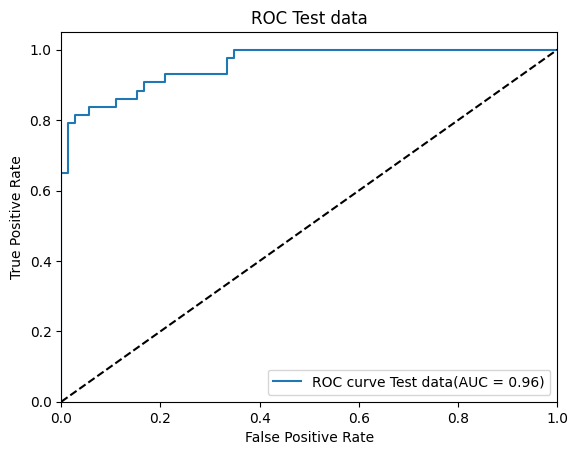

confiusion matrix test
[[71  1]
 [13 30]]


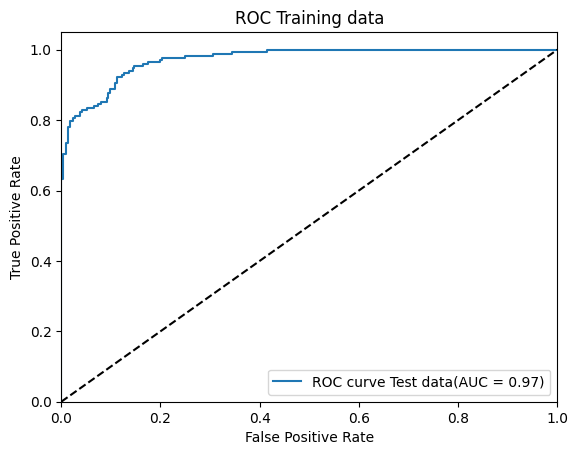

confiusion matrix train
[[285   0]
 [ 70  99]]


In [10]:
M = 30
accuracy_train = []
accuracy_test = []
precision_train = []
precision_test = []
recall_train = []
recall_test = []
f1_train = []
f1_test = []
auc_train = []
auc_test = []
confusion_train = []
confusion_test = []

for i in range(M):
    # split the data 
    X_train, X_test, y_train, y_test = get_split(random_state=i)

    # fit
    kmeans = KMeans(n_clusters=2, init='random', random_state=i)
    kmeans.fit(X_train) 
    
    # centers
    cluster_centers = kmeans.cluster_centers_
    closest_points_indices = []
    for center in cluster_centers:
        distances = cdist(X_train, [center], 'euclidean')
        closest_indices = np.argsort(distances.ravel())[:30]
        closest_points_indices.append(closest_indices)

    # Majority poll within the closest data points
    if np.sum(y_train[closest_points_indices[0]]) > np.sum(y_train[closest_points_indices[1]]):
        flipe = 1
    else:
        flipe = 0  
    
    # Predict on the training and test sets
    y_train_pred = kmean_pred(kmeans, X_train, flipe) 
    y_test_pred = kmean_pred(kmeans, X_test, flipe) 
    
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_test.append(accuracy_score(y_test, y_test_pred))
    precision_train.append(precision_score(y_train, y_train_pred))
    precision_test.append(precision_score(y_test, y_test_pred))
    recall_train.append(recall_score(y_train, y_train_pred))
    recall_test.append(recall_score(y_test, y_test_pred))
    f1_train.append(f1_score(y_train, y_train_pred))
    f1_test.append(f1_score(y_test, y_test_pred))
    auc_train.append(roc_auc_score(y_train, y_train_pred))
    auc_test.append(roc_auc_score(y_test, y_test_pred))
    
    print('Iteration:', i+1, '| Training Accuracy:', round(accuracy_train[-1],3), '| Test Accuracy:', round(accuracy_train[-1],3),'\n')
    
# Averaging all metrics
print('-'*60)
print("Averaging all metrics")

data = {
    'acc' : [np.average(np.array(accuracy_train)), np.average(np.array(accuracy_test))],
    'precision' : [np.average(np.array(precision_train)), np.average(np.array(precision_test))],
    'recall' : [np.average(np.array(recall_train)), np.average(np.array(recall_test))],
    'f1-score' : [np.average(np.array(f1_train)), np.average(np.array(f1_test))],
    'auc' : [np.average(np.array(auc_train)), np.average(np.array(auc_test))],
}
summary = pd.DataFrame(data)
summary.set_index = ['training', 'test']
print(summary)
print('-'*60)

# ROC curve for test 
y_test_pred_prob = kmean_prob(kmeans, X_test, flipe) 
fpr, tpr, _ = roc_curve(y_test, y_test_pred_prob[:,0])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve Test data(AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Test data')
plt.legend(loc='lower right')
plt.show()

# confiusion matrix test
print('confiusion matrix test')
print(confusion_matrix(y_test, y_test_pred))

# ROC curve for train
y_train_pred_prob = kmean_prob(kmeans, X_train, flipe) 
fpr, tpr, _ = roc_curve(y_train, y_train_pred_prob[:,0])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve Test data(AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Training data')
plt.legend(loc='lower right')
plt.show()

# confiusion matrix training
print('confiusion matrix train')
print(confusion_matrix(y_train, y_train_pred))
    
     


### 1(b)-iv. **Spectral Clustering:** Repeat 1(b)iii ....

In [11]:
def spectral_clustering_pred(model, X, flip):
    temp = model.predict(X)
    return (1-flip)*temp + flip*(1-temp)

def kmean_prob(model, X, flip):
    temp = model.transform(X)
    temp = softmax(temp/100,axis=1)
    return (1-flip)*temp + flip*(1-temp)

Iteration: 1 | Training Accuracy: 0.885 | Test Accuracy: 0.885 

Iteration: 2 | Training Accuracy: 0.89 | Test Accuracy: 0.89 

Iteration: 3 | Training Accuracy: 0.883 | Test Accuracy: 0.883 

Iteration: 4 | Training Accuracy: 0.883 | Test Accuracy: 0.883 

Iteration: 5 | Training Accuracy: 0.874 | Test Accuracy: 0.874 

Iteration: 6 | Training Accuracy: 0.888 | Test Accuracy: 0.888 

Iteration: 7 | Training Accuracy: 0.881 | Test Accuracy: 0.881 

Iteration: 8 | Training Accuracy: 0.879 | Test Accuracy: 0.879 

Iteration: 9 | Training Accuracy: 0.874 | Test Accuracy: 0.874 

Iteration: 10 | Training Accuracy: 0.888 | Test Accuracy: 0.888 

Iteration: 11 | Training Accuracy: 0.881 | Test Accuracy: 0.881 

Iteration: 12 | Training Accuracy: 0.888 | Test Accuracy: 0.888 

Iteration: 13 | Training Accuracy: 0.868 | Test Accuracy: 0.868 

Iteration: 14 | Training Accuracy: 0.894 | Test Accuracy: 0.894 

Iteration: 15 | Training Accuracy: 0.879 | Test Accuracy: 0.879 

Iteration: 16 | Train

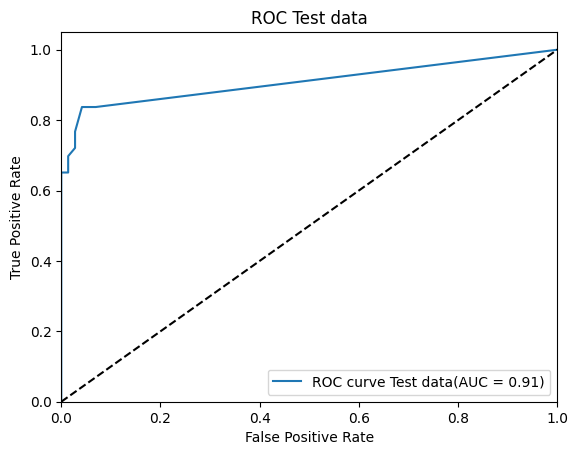

confiusion matrix test
[[71  1]
 [13 30]]


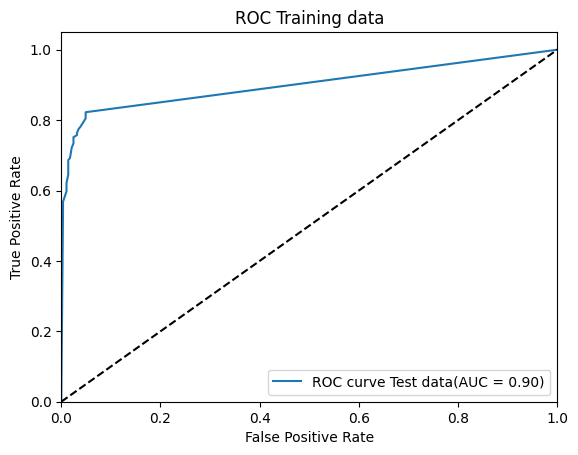

confiusion matrix train
[[280   5]
 [ 52 117]]


In [12]:
M = 30
accuracy_train = []
accuracy_test = []
precision_train = []
precision_test = []
recall_train = []
recall_test = []
f1_train = []
f1_test = []
auc_train = []
auc_test = []
confusion_train = []
confusion_test = []

for i in range(M):
    # split the data 
    X_train, X_test, y_train, y_test = get_split(random_state=i)
    X_train = normalizer.fit_transform(X_train)
    X_test = normalizer.fit_transform(X_test)
    
    # fit
    spectral_clustering = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1, n_jobs=-1, random_state=i)
    labels = spectral_clustering.fit_predict(X_train)

    # Majority poll within the closest data points
    if np.dot(y_train,labels) < np.dot(y_train,1-labels):
        y_train_spectral = 1-labels
    else:
        y_train_spectral = labels
    
    # KNN
    knn = KNeighborsClassifier(n_neighbors=20)
    knn.fit(X_train, y_train_spectral)
    
    # Predict on the training and test sets
    y_train_pred = knn.predict(X_train) 
    y_test_pred =  knn.predict(X_test) 
    
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_test.append(accuracy_score(y_test, y_test_pred))
    precision_train.append(precision_score(y_train, y_train_pred))
    precision_test.append(precision_score(y_test, y_test_pred))
    recall_train.append(recall_score(y_train, y_train_pred))
    recall_test.append(recall_score(y_test, y_test_pred))
    f1_train.append(f1_score(y_train, y_train_pred))
    f1_test.append(f1_score(y_test, y_test_pred))
    auc_train.append(roc_auc_score(y_train, y_train_pred))
    auc_test.append(roc_auc_score(y_test, y_test_pred))
    
    print('Iteration:', i+1, '| Training Accuracy:', round(accuracy_train[-1],3), '| Test Accuracy:', round(accuracy_train[-1],3),'\n')
    
# Averaging all metrics
print('-'*60)
print("Averaging all metrics")

data = {
    'acc' : [np.average(np.array(accuracy_train)), np.average(np.array(accuracy_test))],
    'precision' : [np.average(np.array(precision_train)), np.average(np.array(precision_test))],
    'recall' : [np.average(np.array(recall_train)), np.average(np.array(recall_test))],
    'f1-score' : [np.average(np.array(f1_train)), np.average(np.array(f1_test))],
    'auc' : [np.average(np.array(auc_train)), np.average(np.array(auc_test))],
}
summary = pd.DataFrame(data)
summary.set_index = ['training', 'test']
print(summary)
print('-'*60)

# ROC curve for test 
y_test_pred_prob = knn.predict_proba(X_test) 
fpr, tpr, _ = roc_curve(y_test, y_test_pred_prob[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve Test data(AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Test data')
plt.legend(loc='lower right')
plt.show()

# confiusion matrix test
print('confiusion matrix test')
print(confusion_matrix(y_test, y_test_pred))

# ROC curve for train
y_train_pred_prob =  knn.predict_proba(X_train) 
fpr, tpr, _ = roc_curve(y_train, y_train_pred_prob[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve Test data(AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Training data')
plt.legend(loc='lower right')
plt.show()

# confiusion matrix training
print('confiusion matrix train')
print(confusion_matrix(y_train, y_train_pred))

### 1(b)-v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.*

**Observation:**
> Based on the summarizing findings, we may conclude that Supervised outperforms Semi-Supervised, which outperforms Unsupervised. However, the difference between semi-supervised and unsupervised is significantly more dramatic and substantial than the difference between supervised and semi-supervised. This is an expected tendency because the supervised method already has more label information as guidance to make the prediction, whereas the semi-supervised strategy has less. Unsupervised, on the other hand, produces predictions based on feature similarity and so does not perform as well as supervised or semi-supervised.

# 2. Active Learning Using Support Vector Machines

## 2(a). Download the banknote authentication Data Set ...

In [13]:
banknote_data = "../data/data_banknote_authentication.txt"

banknote_data = pd.read_csv(banknote_data, header=None)
banknote_data.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
banknote_data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [14]:
banknote_data['class'].value_counts()

class
0    762
1    610
Name: count, dtype: int64

In [15]:
X_full = np.array(banknote_data.drop('class',axis=1))  
y_full =  np.array(banknote_data['class'])  

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=472/(900+472), random_state=RS)

## 2(b). Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each...

### 2(b)-i. Train a SVM ...

In [16]:
lin_svc_test_error = []
for i in range(50):
    temp_error = []
    # shuffling
    rng = np.random.default_rng(seed=i)
    X_train_shuffel = rng.permutation(X_train, axis=0)
    rng = np.random.default_rng(seed=i)
    y_train_shuffel = rng.permutation(y_train, axis=0)
    
    # linear SVC
    for j in range(10, 901, 10):
        X_selected = X_train_shuffel[:j]
        y_selected = y_train_shuffel[:j]

        model = LinearSVC(penalty='l1', dual=False, random_state=j)
        skf = StratifiedKFold(n_splits=5, random_state=j, shuffle=True)
        param_grid = {'C': np.logspace(-2, 0, num=20, endpoint=True, base=10.0)}
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=skf, n_jobs=-1)
        grid_search.fit(X_selected, y_selected)
        
        y_pred = grid_search.best_estimator_.predict(X_test)
        temp_error.append(accuracy_score(y_test, y_pred))
        
    lin_svc_test_error.append(temp_error)

### 2(b)-ii. Train a SVM with a pool of 10 randomly selected data points...

In [27]:
lin_svc_test_error_2 = []
for i in range(50):
    temp_error = []
    I_remain = np.arange(X_train.shape[0])
    rng = np.random.default_rng(seed=i)
    I_selected = rng.choice(I_remain, size=10,  replace=False)

    I_remain = np.delete(I_remain, I_selected)
    X_selected = X_train[I_selected]
    y_selected = y_train[I_selected]

    for j in range(10, 901, 10):
        
        model = LinearSVC(penalty='l1', dual=False, random_state=j)
        skf = StratifiedKFold(n_splits=5, random_state=j, shuffle=True)
        param_grid = {'C': np.logspace(-2, 0, num=20, endpoint=True, base=10.0)}
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=skf, n_jobs=-1)
        grid_search.fit(X_selected, y_selected)
        
        y_pred = grid_search.best_estimator_.predict(X_test)
        temp_error.append(accuracy_score(y_test, y_pred))
        
        if j == 900 :
            break
        
        dist = np.abs(grid_search.best_estimator_.decision_function(X_train[I_remain]))
        smallest_dist_indices = np.argsort(dist)[:10]
        I_selected = I_remain[smallest_dist_indices]
        I_remain = np.delete(I_remain, smallest_dist_indices)
        X_selected = np.concatenate((X_selected, X_train[I_selected]))
        y_selected = np.concatenate((y_selected, y_train[I_selected]))
        
    lin_svc_test_error_2.append(temp_error)



## 2(c). Average the 50 test errors for each of the incrementally trained 90 SVMs in...

In [28]:
passive = np.mean(np.array(lin_svc_test_error),axis=0)
active = np.mean(np.array(lin_svc_test_error_2),axis=0)

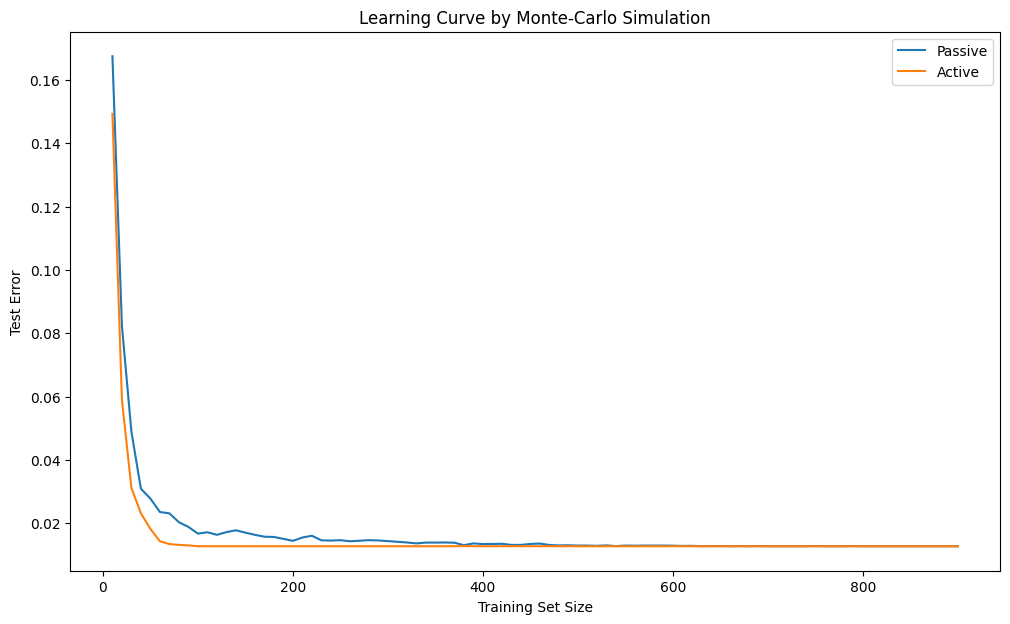

In [29]:
fig, axes = plt.subplots(figsize=(12, 7))
axes.set_title("Learning Curve by Monte-Carlo Simulation")
x = 10 * np.arange(1, 91)
axes.plot(x, 1 - passive, label='Passive')
axes.plot(x, 1 - active, label='Active')
axes.set_xlabel("Training Set Size")
axes.set_ylabel("Test Error")
axes.legend()
plt.show()